In [1]:
%matplotlib inline
__author__           = "Anzal KS"
__copyright__        = "Copyright 2022-, Anzal KS"
__maintainer__       = "Anzal KS"
__email__            = "anzalks@ncbs.res.in"
from pathlib import Path
import neo.io as nio
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as spy

In [6]:
f = '/Users/anzalks/Documents/Expt_data/Recordings/CA1_recordings/x_spread_30min_recordings/2022_12_09/data/2022_12_09_cell_1/2022_12_09_0007.abf'
f_plt = '/Users/anzalks/Documents/Expt_data/Recordings/CA3_recordings/2022_11_21/2022_11_21_0004_Pattern_full.png'
file_name = f.split('/')[-1]

In [7]:
"""
extra functions
"""
"""
data filter function
"""
def filter_data(data, cutoff, filt_type, fs, order=3):
    '''
    creates and applies a filter
    '''
    b, a = spy.butter(order, cutoff, btype = filt_type, analog=False, output='ba', fs=fs)
    return spy.filtfilt(b, a, data)
    """
    b, a = spy.butter(order, cutoff, analog=False, output='ba', fs=fs)
    return spy.filtfilt(b, a, data)
    """

def downsampling_funct(d_array, initial_fs, final_fs):
    """
    down sampling function
    downsampling from 32 khz to 1khz
    initial_fs = initial smapling rate
    final_fs = final sampling rate
    1_d_array = 1 d rray with samples(ep_single channel data)
    """
    downsampling_factor = np.floor(initial_fs/final_fs)
    dat_idx = np.arange(0,len(d_array), downsampling_factor).astype(np.int32)
    ds_dat = d_array[dat_idx]
    return ds_dat

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = spy.butter(N=order, Wn=[low, high], btype='bandpass')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = spy.lfilter(b, a, data)
    return y


1


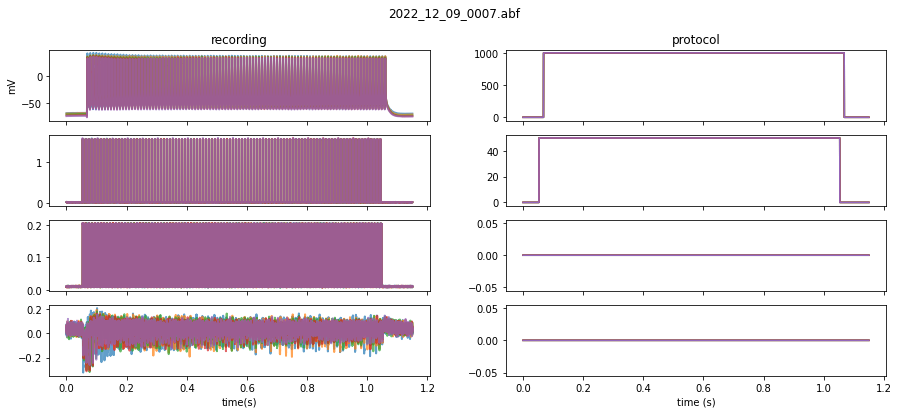

In [8]:
reader = nio.AxonIO(f)
channels = reader.header['signal_channels']
chan_count = len(channels)
block  = reader.read_block(signal_group_mode='split-all')
segments = block.segments
sample_trace = segments[0].analogsignals[0]
sampling_rate = sample_trace.sampling_rate
ti = sample_trace.t_start
tf = sample_trace.t_stop
total_time = int(tf-ti)
protocol_raw = reader.read_raw_protocol()
protocol_raw = protocol_raw[0]
print(total_time)
unit = str(sample_trace.units).split()[1]
#        print(unit)
fig, axs = plt.subplots(chan_count,2,figsize=(15,6),sharex='col')
for i in range(chan_count):
    trace_average = []
    for s, segment in enumerate(segments):
        analogsignals = segment.analogsignals[i]
        unit = str(analogsignals.units).split()[1]
        trace = np.array(analogsignals)
        trace_average.append(trace)
        t = np.linspace(0,float(tf-ti),len(trace))
        axs[i][0].plot(t,trace,alpha=0.7,linewidth=2, label = f'trial - {s+1}')
    axs[0][0].set_title('recording')
    axs[0][0].set_ylabel(unit)
    axs[3][0].set_xlabel('time(s)')
    
    
    for n in protocol_raw:
        p = n[i]
        axs[i][1].plot(t,p)
    axs[0][1].set_title('protocol')
        

#axs[0][0].set_xlim(0.9,7.5) #7 pulses
#axs[0][0].set_xlim(2.105,2.12) #2nd pulse
#axs[0][0].set_xlim(4.105,4.12) #middle pulse
#axs[0][0].set_xlim(7.105,7.12) #last pulse

fig.suptitle(file_name)
plt.xlabel('time (s)',loc='center')
plt.show()
plt.close()
#fig.savefig(f_plt)

10


KeyboardInterrupt: 

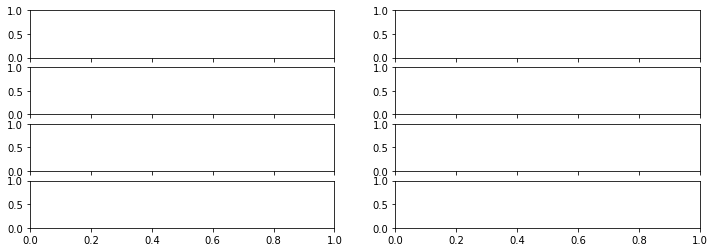

In [5]:
"""
Takes more time with filter
"""
reader = nio.AxonIO(f)
channels = reader.header['signal_channels']
chan_count = len(channels)
block  = reader.read_block(signal_group_mode='split-all')
segments = block.segments
sample_trace = segments[0].analogsignals[0]
sampling_rate = sample_trace.sampling_rate
ti = sample_trace.t_start
tf = sample_trace.t_stop
total_time = int(tf-ti)
protocol_raw = reader.read_raw_protocol()
protocol_raw = protocol_raw[0]
print(total_time)
unit = str(sample_trace.units).split()[1]
#        print(unit)
fig, axs = plt.subplots(chan_count,2,figsize=(12,4),sharex='col')
for i in range(chan_count):
    trace_average = []
    for s, segment in enumerate(segments):
        analogsignals = segment.analogsignals[i]
        unit = str(analogsignals.units).split()[1]
        trace = np.array(analogsignals)
        #print(segment.__dict__)
        if i==0:
            trace = np.transpose(trace)
            trace = butter_bandpass_filter(trace, 100, 2000, int(sampling_rate), order=1)
        else:
            continue
            #trace =np.transpose(trace)
        trace  = downsampling_funct(trace, int(sampling_rate), 2000)
        trace_average.append(trace)
#    print(f'length of trace = {len(trace)}')
        t = np.linspace(0,float(tf-ti),len(trace))
        downsampling_funct(t, int(sampling_rate), 2000)
        if i <=2:
            axs[i][0].plot(t,trace,alpha=0.7,linewidth=2, label = f'trial - {s+1}')
    axs[0][0].set_title('recording')
    axs[0][0].set_ylabel(unit)
    
    for n in protocol_raw:
        p = np.transpose(n[i])
        p = downsampling_funct(p, int(sampling_rate), 2000)
        #axs[i][1].plot(t,p)
    axs[0][1].set_title('protocol')
        

axs[0][0].set_xlim(1,4.2)
fig.suptitle(file_name)
plt.xlabel('time (s)',loc='center')
plt.show()
plt.close()
#fig.savefig(f_plt)